## Lasso

Regularization is one of the most significant method to prevent model overfitting. In general, all supervised machine algorithms are regularizing parameters while minimizing the empirical error function. Minimizing the empirical error is to fit the training data to a great extent, and the parameter-regularization is to prevent overfitting the training data. The core principle of supervised machine learning is the following formula:
$$
\text{min}\frac{1}{N}\sum ^{N}_{i=1}L(y_{i}, f(x_{i}))+ \lambda J(f)
$$

The second term of the formula above is regulation, and $\lambda$ is the regulation parameter, which is usually larger than 0 and is used to adjust the relationship between empirical error term and regulation term. When $\lambda = 0$, there is no regulation term in the formula and the model will spend all effort on minimizing the empirical error, which can easily cause model overfitting. As $\lambda$ to be larger, regulation term plays a more and more important role in the model and the punishment for model complexity would be heavier as well. In the actual training process, $\lambda$ as a hyperparameter largely determines the efficiency of the model.

For regulation, the most commonly used are L1 and L2 regulation. In addition to these two, there is also L0 regulation, which is the number of non-zero element on the matrix. Its gaol is to make the element in the regulation parameter matrix to be 0 as more as possible. In the field of machine learning, both L0 and L1 can achieve matrix sparsity, but in practice, L1 has better generalized solving properties. The L1 norm is the sum of the absolute values of the elements in the matrix, which is usually used to achieve the sparsity of the parameter matrix.

The full name of Lasso is called Least absolute shrinkage and selection operator. Its essence is to add an L1 regularization constraint to the parameters on the basis of conventional linear regression. Its form is as follows:
$$
\text{min}\frac{1}{N}\sum ^{N}_{i=1}L(y_{i}, f(x_{i}))+ \lambda ||w||_{1}
$$

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = np.genfromtxt('data.dat', delimiter = ',')
x = data[:,0:100]
y = data[:,100].reshape(-1, 1)
# add a column
X = np.column_stack((np.ones((x.shape[0], 1)), x))

# split training and test set
X_train, y_train = X[:70], y[:70]
X_test, y_test = X[70:], y[70:]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(70, 101) (70, 1) (31, 101) (31, 1)


In [16]:
# initialize the parameter
def initialize(dims):
    w = np.zeros((dims, 1)) 
    b=0
    return w, b

In [17]:
# define sign function
def sign(x): 
    if x > 0:
        return 1 
    elif x < 0:
        return -1 
    else:
        return 0

In [18]:
# vectorize sign function
vec_sign = np.vectorize(sign)
vec_sign(np.zeros((3,1)))

array([[0],
       [0],
       [0]])

In [19]:
# define lasso loss function
def l1_loss(X, y, w, b, alpha):
    num_train = X.shape[0]
    num_feature = X.shape[1]
    # model function
    y_hat = np.dot(X, w) + b
    # loss function
    loss = np.sum((y_hat-y)**2)/num_train + np.sum(alpha*abs(w))
    # partial derivatives of parameters
    dw = np.dot(X.T, (y_hat-y))/num_train + alpha*vec_sign(w)
    db = np.sum((y_hat-y)) / num_train
    return y_hat, loss, dw, db

In [20]:
# define training process
def lasso_train(X, y, learning_rate=0.01, epochs=300):
    w, b = initialize(X.shape[1])
    loss_list = []
    for i in range(1, epochs):
        # calculate the current estimation, loss, and partial derivatives
        y_hat, loss, dw, db = l1_loss(X, y, w ,b, 0.1)
        loss_list.append(loss)
        # update parameters based on gradient descent
        w += -learning_rate * dw
        b += -learning_rate * db

        if i % 50 == 0:
            print('epoch %d loss %f' % (i, loss))

        # save parameters
        params = {'w':w, 'b':b}
        # save gradient
        grads = {'dw':dw, 'db':db}

    return loss_list, loss, params, grads

In [21]:
loss_list, loss, params, grads = lasso_train(X_train, y_train, 0.01, 500)

epoch 50 loss 3.197738
epoch 100 loss 2.297934
epoch 150 loss 1.990075
epoch 200 loss 1.832027
epoch 250 loss 1.734467
epoch 300 loss 1.673867
epoch 350 loss 1.634849
epoch 400 loss 1.608013
epoch 450 loss 1.589218


In [23]:
# define prediction function
def predict(X, params): 
        w = params['w']
        b = params['b']
        y_pred = np.dot(X, w) + b 
        return y_pred

In [24]:
y_pred = predict(X_test, params)
print(y_pred[:5], y_test[:5])

[[-0.01480912]
 [-2.74362623]
 [ 0.87516961]
 [-0.63294365]
 [-3.6281708 ]] [[ 0.24671]
 [-4.25711]
 [ 2.38642]
 [-1.87815]
 [-3.41362]]


In [25]:
from sklearn.metrics import r2_score
r2_score(y_pred, y_test)

0.15267252949629784

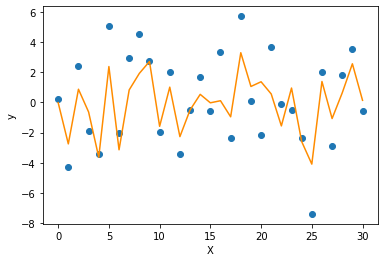

In [28]:
# plot the prediction and actual data
f = X_test.dot(params['w']) + params['b']
plt.scatter(range(X_test.shape[0]), y_test)
plt.plot(f, color = 'darkorange')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

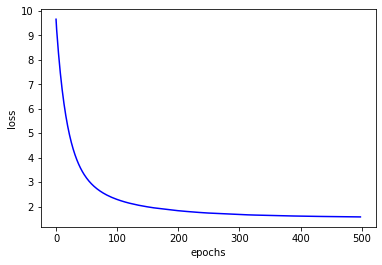

In [29]:
# plot the decline of loss during the training
plt.plot(loss_list, color = 'blue')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

Under the constraint of L1, the coefficients of many features with low label contribution rate become 0 during the training process. This is what L1 does, which can perform feature selection and achieve sparseness to a certain extent.

In [22]:
# lasso in sklearn
from sklearn import linear_model

sk_lasso = linear_model.Lasso(alpha=0.1)

sk_lasso.fit(X_train, y_train)
print("sklearn Lasso intercept :", sk_lasso.intercept_)
print("\nsklearn Lasso coefficients :\n", sk_lasso.coef_)
print("\nsklearn Lasso number of iterations :", sk_lasso.n_iter_)

sklearn Lasso intercept : [-0.23824815]

sklearn Lasso coefficients :
 [ 0.         -0.          0.59804516  0.64230683  0.          1.0070841
 -0.          0.81815409 -0.22756851  0.          0.          0.793601
  0.          0.74108335 -0.         -0.1250168  -0.          0.79407074
  0.          0.81867433  0.          0.         -0.          0.56664364
 -0.         -0.         -0.         -0.         -0.          0.49526526
  0.          0.          0.          0.         -0.         -0.
 -0.         -0.         -0.         -0.          0.         -0.
  0.         -0.         -0.0078254   0.          0.         -0.
 -0.          0.01986066  0.         -0.          0.         -0.
  0.         -0.06797763  0.24581414  0.         -0.04180909 -0.
  0.10542471  0.03156005  0.          0.          0.         -0.
 -0.          0.         -0.          0.12548825  0.2340209  -0.
  0.          0.16875552  0.          0.01596168  0.         -0.
  0.          0.         -0.          0.2005080